In [2]:
import sys
import asyncio
import logging

import numpy as np

from lsst.ts import salobj

import matplotlib.pyplot as plt

from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign

In [3]:
stream_handler = logging.StreamHandler(sys.stdout)

logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [4]:
cwfs = LatissCWFSAlign(index=1)

In [5]:
await cwfs.start_task

Read historical data in 0.02 sec
Read historical data in 0.26 sec
Read historical data in 0.96 sec
Read historical data in 1.59 sec
Read historical data in 1.78 sec
Read historical data in 2.73 sec
Read historical data in 2.95 sec
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 74 messages
Read historical data in 3.96 sec
Read historical data in 4.18 sec
Read historical data in 5.65 sec
Read historical data in 6.78 sec
RemoteTelemetry(ATDome, 0, position) falling behind; read 30 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 11 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 13 messages
Read historical data in 0.19 sec
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 13 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 13 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 15 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 41 messages


In [5]:
await cwfs.attcs.slew_object(name="HD 27", rot_sky=0.)

Starting new HTTP connection (1): simbad.u-strasbg.fr:80
http://simbad.u-strasbg.fr:80 "POST /simbad/sim-script HTTP/1.1" 200 None
Slewing to HD 27583: 04 20 27.7784 -21 13 04.721
Sending command
Stop tracking.
Mount tracking state is 9
RemoteEvent(ATMCS, 0, target) falling behind; read 17 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
Got False
Telescope not in position
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.099 | delta Az= -158.356 [Dome] delta Az = -161.875
[Telescope] delta Alt = -000.123 | delta Az= -157.081 [Dome] delta Az = -161.065
[Telescope] delta Alt = -000.122 | delta Az= -153.160 [Dome] delta Az = -159.295
[Telesco

In [6]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


array([2020021800030])

In [ ]:
await cwfs.latiss.atarchiver.evt_heartbeat.next(flush=True)

In [ ]:
await cwfs.latiss.take_object(exptime=5., n=1)

In [ ]:
await asyncio.gather(cwfs.latiss.take_engtest(exptime=30., n=1),
                     cwfs.attcs.slew_object(name="HD 83832", rot_sky=-90.),
                     return_exceptions=True)

In [ ]:
await asyncio.gather(cwfs.latiss.take_engtest(exptime=3., n=5),
                     cwfs.attcs.slew_object(name="HD 83832", rot_sky=0.),
                     return_exceptions=True)

In [ ]:
await cwfs.latiss.take_object(exptime=5., n=1)

In [ ]:
await cwfs.attcs.offset_xy(x=-30., y=0.)

In [ ]:
await cwfs.latiss.take_object(exptime=5.,n=1)

In [ ]:
cwfs.exposure_time

In [ ]:
await cwfs.hexapod_offset(offset=1.5)

In [8]:
cwfs.intra_visit_id = 2020021800031
cwfs.extra_visit_id = 2020021800032

In [19]:
cwfs.angle = -cwfs.camera_rotation_angle

In [9]:
await cwfs.run_cwfs()

Running cwfs in 2020021800031/2020021800032.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000031.yaml
AT_O_20200218_000031: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000031: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000031.yaml
AT_O_20200218_000031: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000031: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000031.yaml
AT_O_20200218_000031: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000031: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000031.yaml
AT_O_20200218_000031: Forcing detector serial to ITL-3800C-068
Using transl

In [10]:
cwfs.show_results()

Measured zernike coeficients: [180.02373098623553, -200.8530035919398, 1120.8439706537197]
De-rotated zernike coeficients: [ -34.27667273  267.53613303 1120.84397065]
Hexapod offset: [ 0.26165399  2.04226056 -0.26686761]
Telescope offsets: [ 15.69923942 122.53563345   0.        ]



In [12]:
await cwfs.hexapod_offset(-0.26686761)

In [13]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
intraImage expId for target: 2020021800033
extraImage expId for target: 2020021800034


In [20]:
cwfs.intra_visit_id = 2020021800033
cwfs.extra_visit_id = 2020021800034

In [21]:
await cwfs.run_cwfs()

Running cwfs in 2020021800033/2020021800034.


/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:306: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000033.yaml
AT_O_20200218_000033: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000033: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000033.yaml
AT_O_20200218_000033: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000033: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000033.yaml
AT_O_20200218_000033: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000033: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000033.yaml
AT_O_20200218_000033: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000033:

In [23]:
cwfs.show_results()

Measured zernike coeficients: [-60.22616183949246, 12.643265139405973, -684.6436103601449]
De-rotated zernike coeficients: [ -60.22616184   12.64326514 -684.64361036]
Hexapod offset: [0.45974169 0.09651347 0.16301038]
Telescope offsets: [27.58450161  5.79080846  0.        ]



In [25]:
await cwfs.hexapod_offset(0.16301038)

In [26]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 22 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 16 messages
intraImage expId for target: 2020021800035
extraImage expId for target: 2020021800036


In [31]:
cwfs.angle = -cwfs.camera_rotation_angle

In [32]:
cwfs.intra_visit_id = 2020021800035
cwfs.extra_visit_id = 2020021800036

RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 66 messages
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 66 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages


In [33]:
await cwfs.run_cwfs()

Running cwfs in 2020021800035/2020021800036.


/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:306: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000035.yaml
AT_O_20200218_000035: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000035: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000035.yaml
AT_O_20200218_000035: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000035: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000035.yaml
AT_O_20200218_000035: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000035: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000035.yaml
AT_O_20200218_000035: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000035:

In [34]:
cwfs.show_results()

Measured zernike coeficients: [-70.97827568028502, -4.807600650907275, -71.47096437032532]
De-rotated zernike coeficients: [-70.97827568  -4.80760065 -71.47096437]
Hexapod offset: [ 0.5418189  -0.03669924  0.0170169 ]
Telescope offsets: [32.5091339 -2.2019545  0.       ]



In [36]:
await cwfs.hexapod_offset(0.0170169)

In [32]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 80 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 83 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 18 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 21 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 21 messages
intraImage expId for target: 2020021800049
extraImage expId for target: 2020021800050
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages


In [6]:
cwfs.angle = -cwfs.camera_rotation_angle

In [33]:
cwfs.intra_visit_id = 2020021800049
cwfs.extra_visit_id = 2020021800050

In [34]:
await cwfs.run_cwfs()

Running cwfs in 2020021800049/2020021800050.


/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:306: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000049.yaml
AT_O_20200218_000049: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000049: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000049.yaml
AT_O_20200218_000049: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000049: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000049.yaml
AT_O_20200218_000049: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000049: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000049.yaml
AT_O_20200218_000049: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200218_000049:

In [35]:
cwfs.show_results()

Measured zernike coeficients: [0.4429672168532265, 65.57110087589889, -185.88616293018487]
De-rotated zernike coeficients: [  37.36508217  -53.88521248 -185.88616293]
Hexapod offset: [-0.28522963 -0.4113375   0.04425861]
Telescope offsets: [-17.11377809 -24.68024999   0.        ]



In [10]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


array([2020021800039])

In [36]:
await cwfs.hexapod_offset(0.04425861)

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


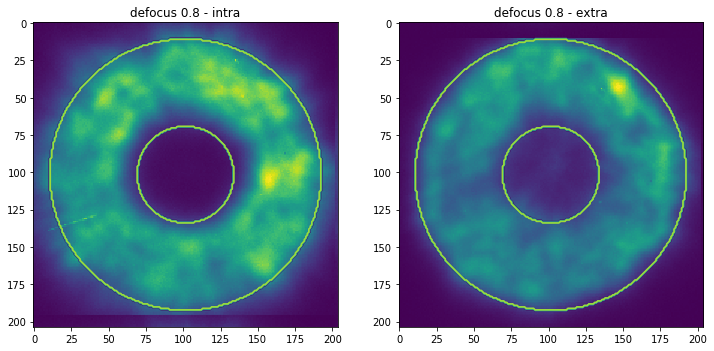

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages


In [11]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [9]:
await cwfs.attcs.slew_object(name="HD 27583", rot_sky=-71.)

Slewing to HD 27583: 04 20 27.7784 -21 13 04.721
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
Got False
Telescope not in position
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.145 | delta Az= -000.147 [Dome] delta Az = +002.985
[Telescope] delta Alt = -000.129 | delta Az= -000.132 [Dome] delta Az = +002.985
[Telescope] delta Alt = -000.129 | delta Az= -000.132 [Dome] delta Az = +002.985
Got True
Waiting for telescope to settle.
[Telescope] delta Alt = -000.128 | delta Az= -000.131 [Dome] delta Az = +002.985
[Telescope] delta Alt = -000.128 | delta Az= -000.131 [Dome] delta Az = +002.985
Telescope in position.
ATDome in position.
['Telescope in position.', 'ATDom

In [10]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800040])

In [11]:
await cwfs.attcs.offset_azel(az=30., el=0.)

Applying Az/El offset: 30.0/ 0.0 
Waiting for telescope to settle.
Done


In [12]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800041])

In [13]:
await cwfs.attcs.offset_azel(az=0., el=30.)

Applying Az/El offset: 0.0/ 30.0 
Waiting for telescope to settle.
Done


In [14]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800042])

In [15]:
await cwfs.attcs.offset_azel(az=0., el=0.)

Applying Az/El offset: 0.0/ 0.0 
Waiting for telescope to settle.
Done


In [53]:
await cwfs.attcs.slew_object(name="HD 27583", rot_sky=-91.)

Slewing to HD 27583: 04 20 27.7784 -21 13 04.721
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
Got False
Telescope not in position
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.143 | delta Az= -000.102 [Dome] delta Az = -000.238
[Telescope] delta Alt = -000.131 | delta Az= -000.092 [Dome] delta Az = -000.238
[Telescope] delta Alt = -000.131 | delta Az= -000.092 [Dome] delta Az = -000.238
Got True
Waiting for telescope to settle.
[Telescope] delta Alt = -000.131 | delta Az= -000.092 [Dome] delta Az = -000.238
Telescope in position.
ATDome in position.
['Telescope in position.', 'ATDome in position.']


In [54]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800057])

In [55]:
azel = await cwfs.attcs.atmcs.tel_mount_AzEl_Encoders.aget()
nasmyth = await cwfs.attcs.atmcs.tel_mount_Nasmyth_Encoders.aget()

angle = np.mean(azel.elevationCalculatedAngle)-np.mean(nasmyth.nasmyth2CalculatedAngle)

print(angle)

0.20586766675274504


In [56]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.2,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [57]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800058])

In [58]:
azel = await cwfs.attcs.atmcs.tel_mount_AzEl_Encoders.aget()
nasmyth = await cwfs.attcs.atmcs.tel_mount_Nasmyth_Encoders.aget()

angle = np.mean(azel.elevationCalculatedAngle)-np.mean(nasmyth.nasmyth2CalculatedAngle)

print(angle)

-0.0030924819399658077


In [59]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': +0.2,
          'y': -0.2,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [60]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800059])

In [61]:
azel = await cwfs.attcs.atmcs.tel_mount_AzEl_Encoders.aget()
nasmyth = await cwfs.attcs.atmcs.tel_mount_Nasmyth_Encoders.aget()

angle = np.mean(azel.elevationCalculatedAngle)-np.mean(nasmyth.nasmyth2CalculatedAngle)

print(angle)

-0.2812875308086191


In [62]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x':  -0.2,
          'y': 0.,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [44]:
await cwfs.attcs.slew_object(name="HD 27583", rot_sky=-85.-3)

Slewing to HD 27583: 04 20 27.7784 -21 13 04.721
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
Got False
Telescope not in position
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.172 | delta Az= -000.107 [Dome] delta Az = -000.238
[Telescope] delta Alt = -000.131 | delta Az= -000.096 [Dome] delta Az = -000.238
[Telescope] delta Alt = -000.130 | delta Az= -000.096 [Dome] delta Az = -000.238
Got True
Waiting for telescope to settle.
[Telescope] delta Alt = -000.131 | delta Az= -000.096 [Dome] delta Az = -000.238
[Telescope] delta Alt = -000.131 | delta Az= -000.096 [Dome] delta Az = -000.238
Telescope in position.
ATDome in position.
['Telescope in position.', 'ATDom

In [45]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')


Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800054])

In [ ]:
azel = await cwfs.attcs.atmcs.tel_mount_AzEl_Encoders.aget()
nasmyth = await cwfs.attcs.atmcs.tel_mount_Nasmyth_Encoders.aget()

angle = np.mean(azel.elevationCalculatedAngle)-np.mean(nasmyth.nasmyth2CalculatedAngle)

print(angle)

In [46]:
await cwfs.attcs.offset_azel(az=30., el=0.)

Applying Az/El offset: 30.0/ 0.0 
Waiting for telescope to settle.
Done


NameError: name 'self' is not defined

In [47]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


array([2020021800055])

In [ ]:
azel = await cwfs.attcs.atmcs.tel_mount_AzEl_Encoders.aget()
nasmyth = await cwfs.attcs.atmcs.tel_mount_Nasmyth_Encoders.aget()

angle = np.mean(azel.elevationCalculatedAngle)-np.mean(nasmyth.nasmyth2CalculatedAngle)

print(angle)

In [48]:
await cwfs.attcs.offset_azel(az=0., el=30.)

Applying Az/El offset: 0.0/ 30.0 
Waiting for telescope to settle.
Done


In [49]:
await cwfs.latiss.take_engtest(exptime=5., n=1, filter='KPNO_406_828nm', grating='empty_1')

Generating group_id
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


array([2020021800056])

In [51]:
azel = await cwfs.attcs.atmcs.tel_mount_AzEl_Encoders.aget()
nasmyth = await cwfs.attcs.atmcs.tel_mount_Nasmyth_Encoders.aget()

angle = np.mean(azel.elevationCalculatedAngle)-np.mean(nasmyth.nasmyth2CalculatedAngle)

print(angle)

-0.4298139296470609


In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax = fig1.add_subplot(111)

ax.imshow(cwfs.detection_exp.image.array)

In [ ]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("matplotlib")

%matplotlib widget

plt.rcParams['figure.figsize'] = [7, 6]

disp = afwDisplay.Display(1, reopenPlot=True)

disp.scale("asinh", "zscale")
disp.mtv(cwfs.detection_exp)

In [ ]:
await cwfs.latiss.atheaderservice.cmd_disable.start()

In [ ]:
await cwfs.latiss.atheaderservice.cmd_standby.start()

In [ ]:
await cwfs.latiss.atheaderservice.cmd_exitControl.start()

In [ ]:
await cwfs.attcs.atmcs.cmd_startTracking.start()

In [ ]:
await cwfs.latiss.enable()

In [ ]:
await cwfs.latiss.take_darks?

In [ ]:
await cwfs.latiss.take_darks(exptime=200, ndarks=3)

In [ ]:
await cwfs.latiss.take_bias(nbias=10)

In [ ]:
from lsst.rapid.analysis.bestEffort import BestEffortIsr
REPODIR = '/mnt/dmcs/oods_butler_repo/repo'
bestEffort = BestEffortIsr(REPODIR)
dataId = {'dayObs': '2020-02-17', 'seqNum': 244}
exp = bestEffort.getExposure(dataId)

In [ ]:
print('test')

In [1]:
await cwfs.attcs.atmcs.cmd_startTraking.start()

NameError: name 'cwfs' is not defined